<a href="https://colab.research.google.com/github/Aqui1983/Module_13_Activities/blob/main/nonlinear_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructor Do: Connecting Neurons

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

## Creating Dummy Data

In [2]:
# Creating dummy non-linear data
X_moons,y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

In [3]:
# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1,1)

In [5]:
# Creating a DataFrame to plot the non-linear dummy data
df_moons = pd.DataFrame(X_moons, columns=['Feature 1','Feature 2'])
df_moons['Target'] = y_moons

df_moons


,Feature 1,Feature 2,Target
0,0.676217,0.815220,0
1,1.487143,-0.210519,1
2,-1.027709,0.354966,0
3,0.236012,1.025531,0
4,1.856695,-0.042783,1
...,...,...,...
995,0.816425,0.584748,0
996,0.864083,0.195920,0
997,1.865044,0.086256,1
998,-0.836507,0.167338,0


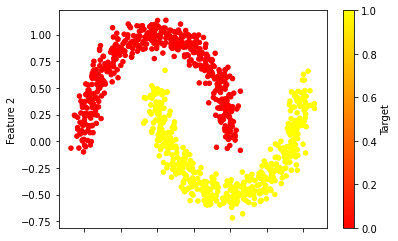

In [6]:
# Plotting the non-linear dummy data
df_moons.plot.scatter(
    x='Feature 1',
    y='Feature 2',
    c='Target',
    colormap='autumn'
)

## Data Preprocessing

In [7]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=1)

In [8]:
# Create the scaler instance
X_moon_scaler = StandardScaler()

In [9]:
# Fit the scaler
X_moon_scaler.fit(X_moon_train)

StandardScaler()

In [10]:
# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)


## Neural Network Model Creation

![Simple neural network](../Images/simple-nn.png)

In [11]:
# Create the sequential model
nn = Sequential()

In [12]:
# First layer
number_inputs = 2
nodes = 6
nn.add(Dense(units=nodes, input_dim=number_inputs, activation='relu'))

### Output Layer

![Output layer](../Images/simple-nn-layer-2.png)

In [13]:
# Output layer
nn.add(Dense(units=1, activation='sigmoid'))

In [14]:
# Model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [15]:
# Compile model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit the Model

In [16]:
# Training the model with the non-linear data
model_moon = nn.fit(X_moon_train_scaled, y_moon_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 1.0400 - accuracy: 0.1507
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9756 - accuracy: 0.1560
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9198 - accuracy: 0.1707
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8708 - accuracy: 0.1800
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8279 - accuracy: 0.1867
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7896 - accuracy: 0.1893
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7550 - accuracy: 0.1920
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7230 - accuracy: 0.2213
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.3040
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.4547
Epoch 11/

## Model Evaluation

In [17]:
# Evaluate the model using non-linear testing data
model_moon_loss, model_moon_accuracy = nn.evaluate(X_moon_test_scaled, y_moon_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.8800
